# Definition of the problem to be solved


In this study we will classify the probability of patients having diabetes or not

Data Base: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press

# Step 1: Libary import

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Database import

In [3]:
diabetes = pd.read_csv('/content/diabetes.csv', sep = ',')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Step 3: Data visualization


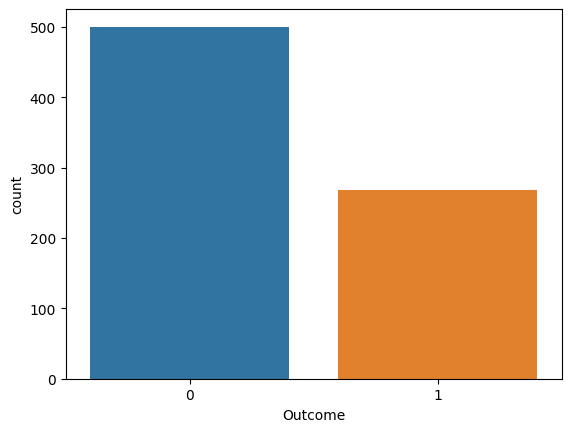

In [8]:
sns.countplot(x = 'Outcome', data = diabetes );

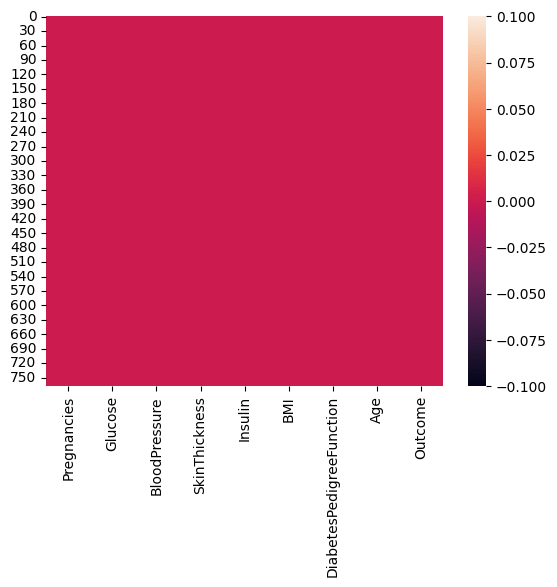

In [10]:
sns.heatmap(diabetes.isnull());

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


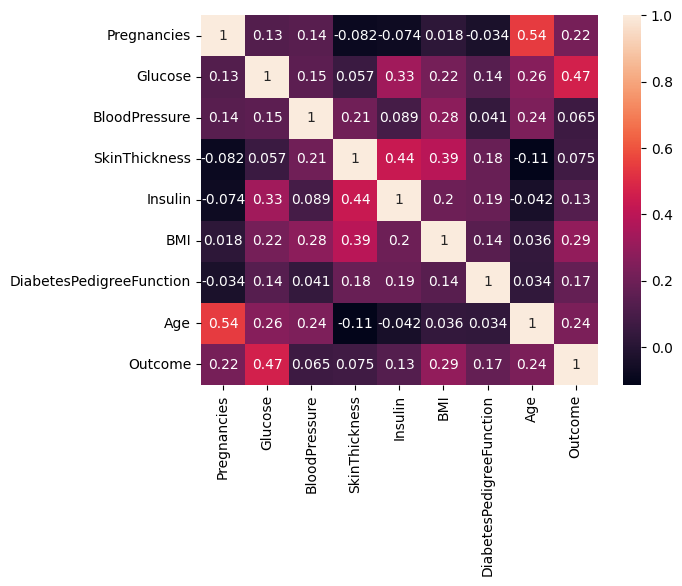

In [12]:
sns.heatmap(diabetes.corr(), annot = True);

# Stpe 4: Data cleaning

In [122]:
y = diabetes['Outcome'].values
y = y.reshape(-1, 1)

In [123]:
select_collums = ['Pregnancies', 'Glucose', #'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
x = diabetes[select_collums].values

In [124]:
x.shape

(768, 6)

In [125]:
y.shape

(768, 1)

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [127]:
x

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

In [129]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

# Step 5: Model building and training

In [163]:
classifier = Sequential()
classifier.add(Dense(units = 500, activation = 'relu', input_shape = (6,)))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(Dense(units = 500, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(Dense(units = 500, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [164]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 500)               3500      
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_39 (Dense)            (None, 500)               250500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_40 (Dense)            (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_41 (Dense)            (None, 1)               

In [165]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [166]:
epochs_hist = classifier.fit(x_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 1s 6ms/step - loss: 0.5448 - accuracy: 0.7248
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 0.7671
Epoch 3/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4770 - accuracy: 0.7671
Epoch 4/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4630 - accuracy: 0.7866
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4713 - accuracy: 0.7671
Epoch 6/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4528 - accuracy: 0.7834
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4539 - accuracy: 0.7736
Epoch 8/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.7704
Epoch 9/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4478 - accuracy: 0.7834
Epoch 10/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.7704
Epoch 11/

# Step 6: Model evaluation

In [167]:
y_pred_train = classifier.predict(x_train)

20/20 [==============================] - 0s 2ms/step


In [168]:
y_pred_train = (y_pred_train > 0.5)

In [169]:
y_pred_train

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

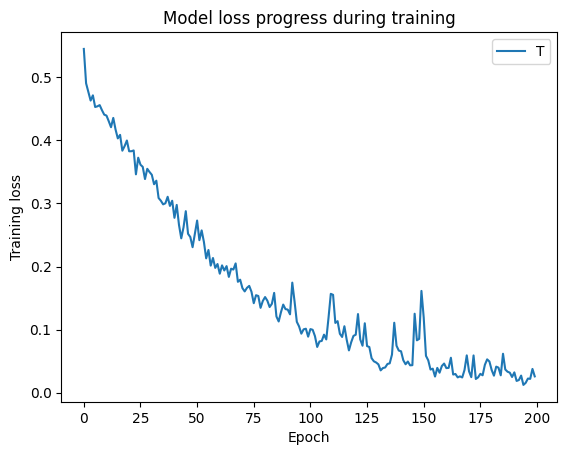

In [170]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss');

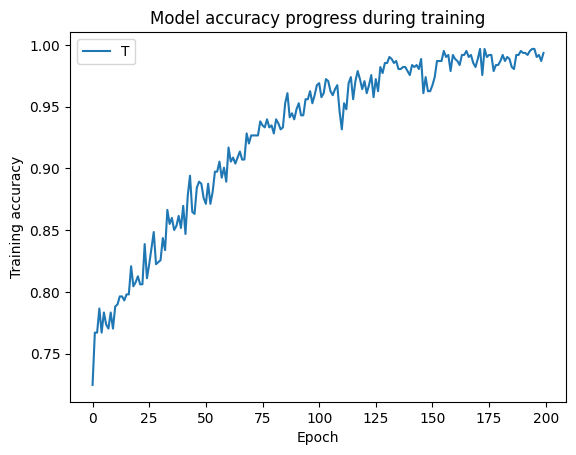

In [171]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend('Training accuracy');

In [172]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[399,   1],
       [  2, 212]])

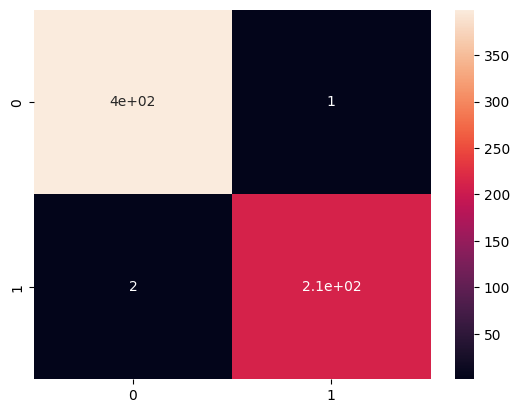

In [173]:
sns.heatmap(cm, annot = True);

In [174]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      0.99      0.99       214

    accuracy                           1.00       614
   macro avg       1.00      0.99      0.99       614
weighted avg       1.00      1.00      1.00       614



In [177]:
y_pred_test = classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)

5/5 [==============================] - 0s 3ms/step


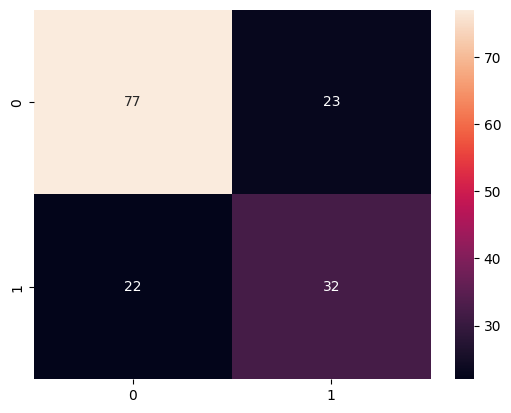

In [178]:
sns.heatmap(cm, annot = True);

In [179]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       100
           1       0.58      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

